# Park Power to the People #

## UP 206a Final - Notebook 2 of 2 ##
## Leslie Velasquez

With my notebook, I aim to continue answering our research question: 'Where do we need parks most in Los Angeles?' I do this by analyzing park density and the amount of park space per capita by neighborhood in the city of Los Angeles. We believe it is important to determine the density of park space by neighborhood and population, as Los Angeles appears to have a large number of parks throughout the city. Therefore, our research question cannot be answered in simple terms of access, or whether parks exist in some neighborhoods. Rather, our question should be answered in terms of equity, both in the amount of park space per neighborhood and the amount of park space per person.

This notebook is divided into the following sections:
1. Import Libraries, LA City Boundaries, and Parks Data and Organize Data
2. Clip LA Parks to Neighborhoods
3. Calculate Park Area as a Percentage of Neighborhood Area
4. Visualize Percent Park Space by Neighborhood
5. Identify Neighborhoods with Lowest and Highest Percent Park Space
6. Calculating Park Space Per Capita
7. Visualize Percent Park Space by Neighborhood
8. Identify Neighborhoods with Lowest and Highest Park Space Per Capita

### 1. Import Libraries, LA City Boundaries, and Parks Data and Organize Data ###
Like the first notebook, I will be using LA city parks, neighborhood, and city boundary data.

In [1]:
# import libraries
import pandas as pd                      # for data wrangling
import geopandas as gpd                  # for analyzing spatial data
import contextily as ctx                 # for base maps
import matplotlib.pyplot as plt          # for plotting data
import plotly.express as px              # for interactive plots
import folium                            # for interactive maps

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# import parks data and reproject
parks = gpd.read_file("https://data.lacity.org/api/geospatial/rwq7-yhp5?method=export&format=GeoJSON")
parks_mercator = parks.to_crs(epsg=3857)

In [3]:
# import LA City boundaries and reproject
city_bounds = gpd.read_file('City_Boundary.geojson')
city_boundary = city_bounds.to_crs(epsg=3857)

In [4]:
# import LA county by neighborhood data and reproject
nhcounty = gpd.read_file("https://usc.data.socrata.com/api/geospatial/r8qd-yxsr?method=export&format=GeoJSON")
nhcounty_mercator = nhcounty.to_crs(epsg=3857)

In [5]:
# import LA city by neighborhood data and reproject
nhcity = gpd.read_file("https://s3-us-west-2.amazonaws.com/mappingla.com/downloads/neighborhoods/la_city.json")
nhcity_mercator = nhcity.to_crs(epsg=3857)

In [6]:
# because the city data does not have neighborhood and the county area does, I will use the list of neighborhoods from the city data to trim the county data to only include city neighborhoods
# create list of city neighborhoods from city data as a new variable
nhcity_list = nhcity['slug'].to_list()
nhcity_list

['adams-normandie',
 'arleta',
 'arlington-heights',
 'atwater-village',
 'baldwin-hillscrenshaw',
 'bel-air',
 'beverly-crest',
 'beverly-grove',
 'beverlywood',
 'boyle-heights',
 'brentwood',
 'broadway-manchester',
 'canoga-park',
 'carthay',
 'central-alameda',
 'century-city',
 'chatsworth',
 'chatsworth-reservoir',
 'chesterfield-square',
 'cheviot-hills',
 'chinatown',
 'cypress-park',
 'del-rey',
 'downtown',
 'eagle-rock',
 'east-hollywood',
 'echo-park',
 'el-sereno',
 'elysian-park',
 'elysian-valley',
 'encino',
 'exposition-park',
 'fairfax',
 'florence',
 'glassell-park',
 'gramercy-park',
 'granada-hills',
 'green-meadows',
 'griffith-park',
 'hancock-park',
 'hansen-dam',
 'harbor-city',
 'harbor-gateway',
 'harvard-heights',
 'harvard-park',
 'highland-park',
 'historic-south-central',
 'hollywood',
 'hollywood-hills',
 'hollywood-hills-west',
 'hyde-park',
 'jefferson-park',
 'koreatown',
 'lake-balboa',
 'lake-view-terrace',
 'larchmont',
 'leimert-park',
 'lincoln-

In [7]:
# use loc command to create new dataframe of county data that only includes neighborhoods in the city data
new_nhcity_merc = nhcounty_mercator.loc[nhcounty_mercator['slug'].isin(['adams-normandie','arleta','arlington-heights','atwater-village',
 'baldwin-hillscrenshaw',
 'bel-air',
 'beverly-crest',
 'beverly-grove',
 'beverlywood',
 'boyle-heights',
 'brentwood',
 'broadway-manchester',
 'canoga-park',
 'carthay',
 'central-alameda',
 'century-city',
 'chatsworth',
 'chatsworth-reservoir',
 'chesterfield-square',
 'cheviot-hills',
 'chinatown',
 'cypress-park',
 'del-rey',
 'downtown',
 'eagle-rock',
 'east-hollywood',
 'echo-park',
 'el-sereno',
 'elysian-park',
 'elysian-valley',
 'encino',
 'exposition-park',
 'fairfax',
 'florence',
 'glassell-park',
 'gramercy-park',
 'granada-hills',
 'green-meadows',
 'griffith-park',
 'hancock-park',
 'hansen-dam',
 'harbor-city',
 'harbor-gateway',
 'harvard-heights',
 'harvard-park',
 'highland-park',
 'historic-south-central',
 'hollywood',
 'hollywood-hills',
 'hollywood-hills-west',
 'hyde-park',
 'jefferson-park',
 'koreatown',
 'lake-balboa',
 'lake-view-terrace',
 'larchmont',
 'leimert-park',
 'lincoln-heights',
 'los-feliz',
 'manchester-square',
 'mar-vista',
 'mid-city',
 'mid-wilshire',
 'mission-hills',
 'montecito-heights',
 'mount-washington',
 'north-hills',
 'north-hollywood',
 'northridge',
 'pacific-palisades',
 'pacoima',
 'palms',
 'panorama-city',
 'pico-robertson',
 'pico-union',
 'playa-del-rey',
 'playa-vista',
 'porter-ranch',
 'rancho-park',
 'reseda',
 'san-pedro',
 'sawtelle',
 'sepulveda-basin',
 'shadow-hills',
 'sherman-oaks',
 'silver-lake',
 'south-park',
 'studio-city',
 'sunland',
 'sun-valley',
 'sylmar',
 'tarzana',
 'toluca-lake',
 'tujunga',
 'university-park',
 'valley-glen',
 'valley-village',
 'van-nuys',
 'venice',
 'vermont-knolls',
 'vermont-slauson',
 'vermont-square',
 'vermont-vista',
 'watts',
 'west-adams',
 'westchester',
 'west-hills',
 'westlake',
 'west-los-angeles',
 'westwood',
 'wilmington',
 'windsor-square',
 'winnetka',
 'woodland-hills'])]

<AxesSubplot:>

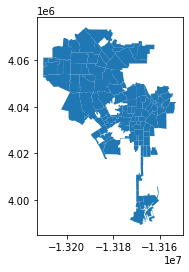

In [8]:
# check to make sure it looks like LA
new_nhcity_merc.plot()

In [9]:
# make sure it has county dataset information
new_nhcity_merc

,external_i,name,location,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type,geometry
1,adams-normandie,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,None,0.805350187789,Adams-Normandie L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),adams-normandie,34.031461499124156,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13170098.527 4033826.516, -13..."
10,arleta,Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,None,3.09617917557,Arleta L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),arleta,34.243099999121583,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13182678.409 4058933.425, -13..."
11,arlington-heights,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,None,1.03141523527,Arlington Heights L.A. County Neighborhood (Cu...,L.A. County Neighborhoods (Current),arlington-heights,34.04491049912405,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13170866.743 4035868.587, -13..."
13,atwater-village,Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,None,1.77689394489,Atwater Village L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),atwater-village,34.131066356759177,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13166682.881 4049365.698, -13..."
17,vermont-slauson,Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,None,1.44245256524,Vermont-Slauson L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),vermont-slauson,33.983913999124709,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13166936.942 4027904.295, -13..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,westwood,Westwood,POINT(34.06523499912381 -118.44047994677246),-118.44047994677246,None,3.6757772963,Westwood L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),westwood,34.06523499912381,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13183557.499 4039456.131, -13..."
268,wilmington,Wilmington,POINT(33.79129350128175 -118.25918700000008),-118.25918700000008,None,9.1412927044,Wilmington L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),wilmington,33.79129350128175,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13160720.194 4005275.275, -13..."
269,windsor-square,Windsor Square,POINT(34.069108499123722 -118.31990900000005),-118.31990900000005,None,0.683463802484,Windsor Square L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),windsor-square,34.069108499123722,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13170621.840 4039053.203, -13..."
270,winnetka,Winnetka,POINT(34.210459499121988 -118.57521950000014),-118.57521950000014,None,4.77724070209,Winnetka L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),winnetka,34.210459499121988,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13198285.178 4059929.744, -13..."


### 2. Clip LA Parks to Neighborhoods ###
Next, I will need to dissolve LA parks into a single layer, and then clip my new LA neighborhoods geodataframe over parks.

In [10]:
# create new column to dissolve parks into a single layer
parks_mercator["fake column"] = 'fake'
parks_mercator.head()

,name,shape_area,objectid,park_id,name_alpha,shape_leng,area_acres,issubpark,region,address,name_publi,park_class,cd_real,geometry,fake column
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,ROBERT F KENNEDY PARK (LAUSD) JUA,641.47054538,0.149251627315,N,M,"3400 W Wilshire Blvd, LA 90010",Kennedy (Robert F) Inspiration Memorial Park (...,N,10,"MULTIPOLYGON (((-13168868.269 4037078.847, -13...",fake
1,Sycamore Grove Park,691462.199493,2,736,SYCAMORE GROVE PARK,6227.3991903,15.8738513625,N,M,"4702 N Figueroa St, LA 90042",Sycamore Grove Park,C,01,"MULTIPOLYGON (((-13158086.069 4042417.355, -13...",fake
2,San Pedro Welcome Park,17402.1579777,3,328,SAN PEDRO WELCOME PARK,560.372862441,0.399500174163,N,P,"451 N Gaffey St, San Pedro 90731",Formerly Welcome Park,N,15,"MULTIPOLYGON (((-13168300.673 3994746.644, -13...",fake
3,Country Club Heritage Park,3647.84860118,4,1045,COUNTRY CLUB PARK HERITAGE PLAZA,287.523337381,0.0837434158085,N,M,"1015 S Wilton Pl, LA 90018",AKA Wilton Place Park,N,10,"MULTIPOLYGON (((-13170769.576 4035829.429, -13...",fake
4,Watts Cultural Crescent,128793.355722,5,1046,WATTS CULTURAL CRESCENT,2852.11033344,2.95670043382,N,P,"1780 E Santa Ana Blvd, LA 90002",AKA Watts Towers Cultural Cresent,N,15,"MULTIPOLYGON (((-13162663.079 4020674.178, -13...",fake


In [11]:
# dissolve parks to one layer
parks_merc_onelayer = parks_mercator.dissolve(by='fake column')

In [12]:
# clip parks to neighborhoods
parksnh_clip = gpd.clip(new_nhcity_merc, parks_merc_onelayer)
parksnh_clip

,external_i,name,location,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type,geometry
1,adams-normandie,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,None,0.805350187789,Adams-Normandie L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),adams-normandie,34.031461499124156,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13169419.979 4032920.598, -13..."
10,arleta,Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,None,3.09617917557,Arleta L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),arleta,34.243099999121583,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13182793.475 4060205.490, -13..."
11,arlington-heights,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,None,1.03141523527,Arlington Heights L.A. County Neighborhood (Cu...,L.A. County Neighborhoods (Current),arlington-heights,34.04491049912405,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13172278.574 4034217.186, -13..."
13,atwater-village,Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,None,1.77689394489,Atwater Village L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),atwater-village,34.131066356759177,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13165799.570 4045104.115, -13..."
17,vermont-slauson,Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,None,1.44245256524,Vermont-Slauson L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),vermont-slauson,33.983913999124709,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13167671.217 4025577.739, -13..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,westwood,Westwood,POINT(34.06523499912381 -118.44047994677246),-118.44047994677246,None,3.6757772963,Westwood L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),westwood,34.06523499912381,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13185329.755 4036229.382, -13..."
268,wilmington,Wilmington,POINT(33.79129350128175 -118.25918700000008),-118.25918700000008,None,9.1412927044,Wilmington L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),wilmington,33.79129350128175,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13168104.946 3997108.550, -13..."
269,windsor-square,Windsor Square,POINT(34.069108499123722 -118.31990900000005),-118.31990900000005,None,0.683463802484,Windsor Square L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),windsor-square,34.069108499123722,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13171743.216 4038864.233, -13..."
270,winnetka,Winnetka,POINT(34.210459499121988 -118.57521950000014),-118.57521950000014,None,4.77724070209,Winnetka L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),winnetka,34.210459499121988,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13201182.636 4055347.431, -13..."


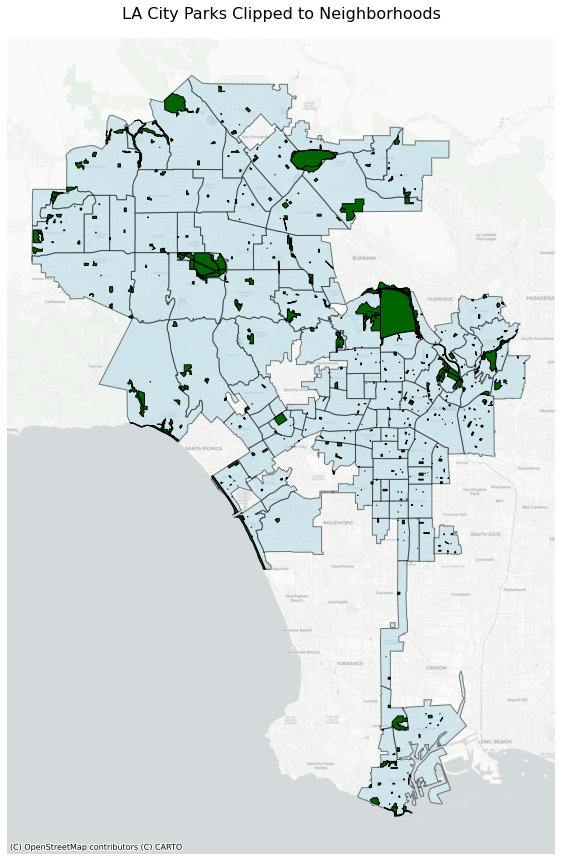

In [13]:
#plot parks clipped to neighborhoods over neighborhoods

fig, ax = plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
new_nhcity_merc.plot(ax=ax,
                color="lightblue",
                alpha=0.5,
                edgecolor="black"
               )

# add the layer with ax=ax in the argument 
parksnh_clip.plot(ax=ax,
                color="darkgreen",
                alpha=1,
                edgecolor="black"
               )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('LA City Parks Clipped to Neighborhoods',fontsize=16,pad=20)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron,zoom=12)


As you can see with this map, parks are scattered throughout the city of LA. However, they vary greatly in size overall and in relation to the neighborhoods they are located in.

### 3. Calculate Park Area as a Percentage of Neighborhood Area ###
In the next section, I will use the .area command to calculate the area of parks in each neighborhood and then use basic math to calculate the area of parks in each neighborhood as a percentage of total neighborhood area.

In [14]:
# create a new column with total park area per neighborhood, calculated using park geometries
parksnh_clip["park area"] = parksnh_clip['geometry'].area
parksnh_clip

,external_i,name,location,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type,geometry,park area
1,adams-normandie,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,None,0.805350187789,Adams-Normandie L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),adams-normandie,34.031461499124156,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13169419.979 4032920.598, -13...",16168.924480
10,arleta,Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,None,3.09617917557,Arleta L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),arleta,34.243099999121583,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13182793.475 4060205.490, -13...",90220.929026
11,arlington-heights,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,None,1.03141523527,Arlington Heights L.A. County Neighborhood (Cu...,L.A. County Neighborhoods (Current),arlington-heights,34.04491049912405,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13172278.574 4034217.186, -13...",1241.996681
13,atwater-village,Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,None,1.77689394489,Atwater Village L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),atwater-village,34.131066356759177,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13165799.570 4045104.115, -13...",553219.071555
17,vermont-slauson,Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,None,1.44245256524,Vermont-Slauson L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),vermont-slauson,33.983913999124709,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13167671.217 4025577.739, -13...",27552.524321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,westwood,Westwood,POINT(34.06523499912381 -118.44047994677246),-118.44047994677246,None,3.6757772963,Westwood L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),westwood,34.06523499912381,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13185329.755 4036229.382, -13...",165409.069891
268,wilmington,Wilmington,POINT(33.79129350128175 -118.25918700000008),-118.25918700000008,None,9.1412927044,Wilmington L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),wilmington,33.79129350128175,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13168104.946 3997108.550, -13...",312469.476720
269,windsor-square,Windsor Square,POINT(34.069108499123722 -118.31990900000005),-118.31990900000005,None,0.683463802484,Windsor Square L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),windsor-square,34.069108499123722,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13171743.216 4038864.233, -13...",10082.936435
270,winnetka,Winnetka,POINT(34.210459499121988 -118.57521950000014),-118.57521950000014,None,4.77724070209,Winnetka L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),winnetka,34.210459499121988,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13201182.636 4055347.431, -13...",152495.651611


In [15]:
# convert park area (sq meters) to sq miles because the neighborhood area data is in sq mi
parksnh_clip["park area sq mi"] = parksnh_clip['park area']/2589988.1103
parksnh_clip.head()

,external_i,name,location,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type,geometry,park area,park area sq mi
1,adams-normandie,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,None,0.805350187789,Adams-Normandie L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),adams-normandie,34.031461499124156,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13169419.979 4032920.598, -13...",16168.924480,0.006243
10,arleta,Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,None,3.09617917557,Arleta L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),arleta,34.243099999121583,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13182793.475 4060205.490, -13...",90220.929026,0.034834
11,arlington-heights,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,None,1.03141523527,Arlington Heights L.A. County Neighborhood (Cu...,L.A. County Neighborhoods (Current),arlington-heights,34.04491049912405,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13172278.574 4034217.186, -13...",1241.996681,0.000480
13,atwater-village,Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,None,1.77689394489,Atwater Village L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),atwater-village,34.131066356759177,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13165799.570 4045104.115, -13...",553219.071555,0.213599
17,vermont-slauson,Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,None,1.44245256524,Vermont-Slauson L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),vermont-slauson,33.983913999124709,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13167671.217 4025577.739, -13...",27552.524321,0.010638


In [16]:
# check data types before doing calculations
parksnh_clip.dtypes

external_i           object
name                 object
location             object
latitude             object
slug_1               object
sqmi                 object
display_na           object
set                  object
slug                 object
longitude            object
name_1               object
kind                 object
type                 object
geometry           geometry
park area           float64
park area sq mi     float64
dtype: object

In [17]:
# convert the sq mi column to a float in order to do calculations
parksnh_clip["sqmi"] = parksnh_clip.sqmi.astype(float)

In [18]:
# create a new column that calculates what percent of the neighborhood is park space
parksnh_clip["percent park space"] = parksnh_clip['park area sq mi']/parksnh_clip['sqmi'] * 100
parksnh_clip.head()

,external_i,name,location,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type,geometry,park area,park area sq mi,percent park space
1,adams-normandie,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,None,0.805350,Adams-Normandie L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),adams-normandie,34.031461499124156,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13169419.979 4032920.598, -13...",16168.924480,0.006243,0.775173
10,arleta,Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,None,3.096179,Arleta L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),arleta,34.243099999121583,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13182793.475 4060205.490, -13...",90220.929026,0.034834,1.125080
11,arlington-heights,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,None,1.031415,Arlington Heights L.A. County Neighborhood (Cu...,L.A. County Neighborhoods (Current),arlington-heights,34.04491049912405,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13172278.574 4034217.186, -13...",1241.996681,0.000480,0.046493
13,atwater-village,Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,None,1.776894,Atwater Village L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),atwater-village,34.131066356759177,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13165799.570 4045104.115, -13...",553219.071555,0.213599,12.020924
17,vermont-slauson,Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,None,1.442453,Vermont-Slauson L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),vermont-slauson,33.983913999124709,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13167671.217 4025577.739, -13...",27552.524321,0.010638,0.737500


### 4. Visualize Percent Park Space by Neighborhood ###
Now that I've calculated the percent park space for each neighborhood, I will create a choropleth map that visualizes the differences in percent park area by neighborhood. Before making my map I will need to merge my clipped data back to the original neighborhood data frame. If I don't do this, my maps will only display park areas, and not neighborhoods.

In [19]:
# view columns from clipped dataframe
parksnh_clip.columns

Index(['external_i', 'name', 'location', 'latitude', 'slug_1', 'sqmi',
       'display_na', 'set', 'slug', 'longitude', 'name_1', 'kind', 'type',
       'geometry', 'park area', 'park area sq mi', 'percent park space'],
      dtype='object')

In [20]:
# remove unnecessary columns from clipped dataframe
trim_parksnh_clip = parksnh_clip.drop(columns=['external_i', 'location', 'latitude', 'slug_1', 'sqmi', 'display_na', 'set', 'longitude', 'name_1', 'kind', 'type'])
trim_parksnh_clip

,name,slug,geometry,park area,park area sq mi,percent park space
1,Adams-Normandie,adams-normandie,"MULTIPOLYGON (((-13169419.979 4032920.598, -13...",16168.924480,0.006243,0.775173
10,Arleta,arleta,"MULTIPOLYGON (((-13182793.475 4060205.490, -13...",90220.929026,0.034834,1.125080
11,Arlington Heights,arlington-heights,"MULTIPOLYGON (((-13172278.574 4034217.186, -13...",1241.996681,0.000480,0.046493
13,Atwater Village,atwater-village,"MULTIPOLYGON (((-13165799.570 4045104.115, -13...",553219.071555,0.213599,12.020924
17,Vermont-Slauson,vermont-slauson,"MULTIPOLYGON (((-13167671.217 4025577.739, -13...",27552.524321,0.010638,0.737500
...,...,...,...,...,...,...
264,Westwood,westwood,"MULTIPOLYGON (((-13185329.755 4036229.382, -13...",165409.069891,0.063865,1.737450
268,Wilmington,wilmington,"MULTIPOLYGON (((-13168104.946 3997108.550, -13...",312469.476720,0.120645,1.319782
269,Windsor Square,windsor-square,"MULTIPOLYGON (((-13171743.216 4038864.233, -13...",10082.936435,0.003893,0.569605
270,Winnetka,winnetka,"MULTIPOLYGON (((-13201182.636 4055347.431, -13...",152495.651611,0.058879,1.232488


In [21]:
# merge trimmed and clipped dataframe back to original nh dataframe
pre_merge = new_nhcity_merc.merge(trim_parksnh_clip, on='slug')
pre_merge

,external_i,name_x,location,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type,geometry_x,name_y,geometry_y,park area,park area sq mi,percent park space
0,adams-normandie,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,None,0.805350187789,Adams-Normandie L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),adams-normandie,34.031461499124156,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13170098.527 4033826.516, -13...",Adams-Normandie,"MULTIPOLYGON (((-13169419.979 4032920.598, -13...",16168.924480,0.006243,0.775173
1,arleta,Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,None,3.09617917557,Arleta L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),arleta,34.243099999121583,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13182678.409 4058933.425, -13...",Arleta,"MULTIPOLYGON (((-13182793.475 4060205.490, -13...",90220.929026,0.034834,1.125080
2,arlington-heights,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,None,1.03141523527,Arlington Heights L.A. County Neighborhood (Cu...,L.A. County Neighborhoods (Current),arlington-heights,34.04491049912405,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13170866.743 4035868.587, -13...",Arlington Heights,"MULTIPOLYGON (((-13172278.574 4034217.186, -13...",1241.996681,0.000480,0.046493
3,atwater-village,Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,None,1.77689394489,Atwater Village L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),atwater-village,34.131066356759177,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13166682.881 4049365.698, -13...",Atwater Village,"MULTIPOLYGON (((-13165799.570 4045104.115, -13...",553219.071555,0.213599,12.020924
4,vermont-slauson,Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,None,1.44245256524,Vermont-Slauson L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),vermont-slauson,33.983913999124709,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13166936.942 4027904.295, -13...",Vermont-Slauson,"MULTIPOLYGON (((-13167671.217 4025577.739, -13...",27552.524321,0.010638,0.737500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,westwood,Westwood,POINT(34.06523499912381 -118.44047994677246),-118.44047994677246,None,3.6757772963,Westwood L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),westwood,34.06523499912381,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13183557.499 4039456.131, -13...",Westwood,"MULTIPOLYGON (((-13185329.755 4036229.382, -13...",165409.069891,0.063865,1.737450
105,wilmington,Wilmington,POINT(33.79129350128175 -118.25918700000008),-118.25918700000008,None,9.1412927044,Wilmington L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),wilmington,33.79129350128175,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13160720.194 4005275.275, -13...",Wilmington,"MULTIPOLYGON (((-13168104.946 3997108.550, -13...",312469.476720,0.120645,1.319782
106,windsor-square,Windsor Square,POINT(34.069108499123722 -118.31990900000005),-118.31990900000005,None,0.683463802484,Windsor Square L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),windsor-square,34.069108499123722,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13170621.840 4039053.203, -13...",Windsor Square,"MULTIPOLYGON (((-13171743.216 4038864.233, -13...",10082.936435,0.003893,0.569605
107,winnetka,Winnetka,POINT(34.210459499121988 -118.57521950000014),-118.57521950000014,None,4.77724070209,Winnetka L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),winnetka,34.210459499121988,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPO

In [22]:
# the merge has made my geodataframe become a regular dataframe. To solve this, I will again merge this merged dataframe to my neighborhood dataframe.
merge_nhparks = new_nhcity_merc.merge(pre_merge, on='slug')
merge_nhparks

,external_i_x,name,location_x,latitude_x,slug_1_x,sqmi_x,display_na_x,set_x,slug,longitude_x,...,longitude_y,name_1_y,kind_y,type_y,geometry_x,name_y,geometry_y,park area,park area sq mi,percent park space
0,adams-normandie,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,None,0.805350187789,Adams-Normandie L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),adams-normandie,34.031461499124156,...,34.031461499124156,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13170098.527 4033826.516, -13...",Adams-Normandie,"MULTIPOLYGON (((-13169419.979 4032920.598, -13...",16168.924480,0.006243,0.775173
1,arleta,Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,None,3.09617917557,Arleta L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),arleta,34.243099999121583,...,34.243099999121583,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13182678.409 4058933.425, -13...",Arleta,"MULTIPOLYGON (((-13182793.475 4060205.490, -13...",90220.929026,0.034834,1.125080
2,arlington-heights,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,None,1.03141523527,Arlington Heights L.A. County Neighborhood (Cu...,L.A. County Neighborhoods (Current),arlington-heights,34.04491049912405,...,34.04491049912405,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13170866.743 4035868.587, -13...",Arlington Heights,"MULTIPOLYGON (((-13172278.574 4034217.186, -13...",1241.996681,0.000480,0.046493
3,atwater-village,Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,None,1.77689394489,Atwater Village L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),atwater-village,34.131066356759177,...,34.131066356759177,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13166682.881 4049365.698, -13...",Atwater Village,"MULTIPOLYGON (((-13165799.570 4045104.115, -13...",553219.071555,0.213599,12.020924
4,vermont-slauson,Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,None,1.44245256524,Vermont-Slauson L.A. County Neighborhood (Curr...,L.A. County Neighborhoods (Current),vermont-slauson,33.983913999124709,...,33.983913999124709,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13166936.942 4027904.295, -13...",Vermont-Slauson,"MULTIPOLYGON (((-13167671.217 4025577.739, -13...",27552.524321,0.010638,0.737500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,westwood,Westwood,POINT(34.06523499912381 -118.44047994677246),-118.44047994677246,None,3.6757772963,Westwood L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),westwood,34.06523499912381,...,34.06523499912381,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13183557.499 4039456.131, -13...",Westwood,"MULTIPOLYGON (((-13185329.755 4036229.382, -13...",165409.069891,0.063865,1.737450
105,wilmington,Wilmington,POINT(33.79129350128175 -118.25918700000008),-118.25918700000008,None,9.1412927044,Wilmington L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),wilmington,33.79129350128175,...,33.79129350128175,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13160720.194 4005275.275, -13...",Wilmington,"MULTIPOLYGON (((-13168104.946 3997108.550, -13...",312469.476720,0.120645,1.319782
106,windsor-square,Windsor Square,POINT(34.069108499123722 -118.31990900000005),-118.31990900000005,None,0.683463802484,Windsor Square L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),windsor-square,34.069108499123722,...,34.069108499123722,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13170621.840 4039053.203, -13...",Windsor Square,"MULTIPOLYGON (((-13171743.216 4038864.233, -13...",10082.936435,0.003893,0.569605
107,winnetka,Winnetka,POINT(34.210459499121988 -118.5752

In [23]:
# look at columns
merge_nhparks.columns

Index(['external_i_x', 'name', 'location_x', 'latitude_x', 'slug_1_x',
       'sqmi_x', 'display_na_x', 'set_x', 'slug', 'longitude_x', 'name_1_x',
       'kind_x', 'type_x', 'geometry', 'external_i_y', 'name_x', 'location_y',
       'latitude_y', 'slug_1_y', 'sqmi_y', 'display_na_y', 'set_y',
       'longitude_y', 'name_1_y', 'kind_y', 'type_y', 'geometry_x', 'name_y',
       'geometry_y', 'park area', 'park area sq mi', 'percent park space'],
      dtype='object')

In [24]:
# remove unnecessary columns from clipped dataframe
merge_nhparks = merge_nhparks.drop(columns=['external_i_x', 'slug_1_x', 'display_na_x', 'set_x', 'name_1_x','kind_x', 'type_x', 'external_i_y','slug_1_y', 'display_na_y', 'set_y','name_1_y', 'kind_y', 'type_y'])
merge_nhparks

,name,location_x,latitude_x,sqmi_x,slug,longitude_x,geometry,name_x,location_y,latitude_y,sqmi_y,longitude_y,geometry_x,name_y,geometry_y,park area,park area sq mi,percent park space
0,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,0.805350187789,adams-normandie,34.031461499124156,"MULTIPOLYGON (((-13170098.527 4033826.516, -13...",Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,0.805350187789,34.031461499124156,"MULTIPOLYGON (((-13170098.527 4033826.516, -13...",Adams-Normandie,"MULTIPOLYGON (((-13169419.979 4032920.598, -13...",16168.924480,0.006243,0.775173
1,Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,3.09617917557,arleta,34.243099999121583,"MULTIPOLYGON (((-13182678.409 4058933.425, -13...",Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,3.09617917557,34.243099999121583,"MULTIPOLYGON (((-13182678.409 4058933.425, -13...",Arleta,"MULTIPOLYGON (((-13182793.475 4060205.490, -13...",90220.929026,0.034834,1.125080
2,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,1.03141523527,arlington-heights,34.04491049912405,"MULTIPOLYGON (((-13170866.743 4035868.587, -13...",Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,1.03141523527,34.04491049912405,"MULTIPOLYGON (((-13170866.743 4035868.587, -13...",Arlington Heights,"MULTIPOLYGON (((-13172278.574 4034217.186, -13...",1241.996681,0.000480,0.046493
3,Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,1.77689394489,atwater-village,34.131066356759177,"MULTIPOLYGON (((-13166682.881 4049365.698, -13...",Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,1.77689394489,34.131066356759177,"MULTIPOLYGON (((-13166682.881 4049365.698, -13...",Atwater Village,"MULTIPOLYGON (((-13165799.570 4045104.115, -13...",553219.071555,0.213599,12.020924
4,Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,1.44245256524,vermont-slauson,33.983913999124709,"MULTIPOLYGON (((-13166936.942 4027904.295, -13...",Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,1.44245256524,33.983913999124709,"MULTIPOLYGON (((-13166936.942 4027904.295, -13...",Vermont-Slauson,"MULTIPOLYGON (((-13167671.217 4025577.739, -13...",27552.524321,0.010638,0.737500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Westwood,POINT(34.06523499912381 -118.44047994677246),-118.44047994677246,3.6757772963,westwood,34.06523499912381,"MULTIPOLYGON (((-13183557.499 4039456.131, -13...",Westwood,POINT(34.06523499912381 -118.44047994677246),-118.44047994677246,3.6757772963,34.06523499912381,"MULTIPOLYGON (((-13183557.499 4039456.131, -13...",Westwood,"MULTIPOLYGON (((-13185329.755 4036229.382, -13...",165409.069891,0.063865,1.737450
105,Wilmington,POINT(33.79129350128175 -118.25918700000008),-118.25918700000008,9.1412927044,wilmington,33.79129350128175,"MULTIPOLYGON (((-13160720.194 4005275.275, -13...",Wilmington,POINT(33.79129350128175 -118.25918700000008),-118.25918700000008,9.1412927044,33.79129350128175,"MULTIPOLYGON (((-13160720.194 4005275.275, -13...",Wilmington,"MULTIPOLYGON (((-13168104.946 3997108.550, -13...",312469.476720,0.120645,1.319782
106,Windsor Square,POINT(34.069108499123722 -118.31990900000005),-118.31990900000005,0.683463802484,windsor-square,34.069108499123722,"MULTIPOLYGON (((-13170621.840 4039053.203, -13...",Windsor Square,POINT(34.069108499123722 -118.31990900000005),-118.31990900000005,0.683463802484,34.069108499123722,"MULTIPOLYGON (((-13170621.840 4039053.203, -13...",Windsor Square,"MULTIPOLYGON (((-13171743.216 4038864.233, -13...",10082.936435,0.003893,0.569605
107,Winnetka,POINT(34.210459499121988 -118.57521950000014),-118.57521950000014,4.77724070209,winnetka,34.210459499121988,"MULTIPOLYGON (((-13198285.178 4059929.744, -13...",Winnetka,POINT(34.210459499121988 -118.57521950000014),-118.57521950000014,4.77724070209,34.2104594

In [25]:
# look at the highest percentages of park space
merge_nhparks.sort_values(by=['percent park space'], ascending=[False]).head(10)

,name,location_x,latitude_x,sqmi_x,slug,longitude_x,geometry,name_x,location_y,latitude_y,sqmi_y,longitude_y,geometry_x,name_y,geometry_y,park area,park area sq mi,percent park space
43,Hansen Dam,POINT(34.265706499121308 -118.37905350000011),-118.37905350000011,1.96106923644,hansen-dam,34.265706499121308,"MULTIPOLYGON (((-13176701.220 4065565.172, -13...",Hansen Dam,POINT(34.265706499121308 -118.37905350000011),-118.37905350000011,1.96106923644,34.265706499121308,"MULTIPOLYGON (((-13176701.220 4065565.172, -13...",Hansen Dam,"POLYGON ((-13176015.393 4065513.488, -13176013...",7.153464e+06,2.761968,140.839888
42,Griffith Park,POINT(34.136873999122869 -118.29715634932774),-118.29715634932774,5.83352180271,griffith-park,34.136873999122869,"MULTIPOLYGON (((-13168978.541 4049996.856, -13...",Griffith Park,POINT(34.136873999122869 -118.29715634932774),-118.29715634932774,5.83352180271,34.136873999122869,"MULTIPOLYGON (((-13168978.541 4049996.856, -13...",Griffith Park,"MULTIPOLYGON (((-13168187.039 4049768.850, -13...",2.047371e+07,7.904942,135.508917
82,Sepulveda Basin,POINT(34.17460099912239 -118.49231650000006),-118.49231650000006,3.13655865329,sepulveda-basin,34.17460099912239,"MULTIPOLYGON (((-13189546.932 4053885.990, -13...",Sepulveda Basin,POINT(34.17460099912239 -118.49231650000006),-118.49231650000006,3.13655865329,34.17460099912239,"MULTIPOLYGON (((-13189546.932 4053885.990, -13...",Sepulveda Basin,"MULTIPOLYGON (((-13188569.885 4053779.799, -13...",8.743576e+06,3.375914,107.631132
30,Elysian Park,POINT(34.081259999123489 -118.23745650000001),-118.23745650000001,1.64508429808,elysian-park,34.081259999123489,"MULTIPOLYGON (((-13160791.549 4038733.344, -13...",Elysian Park,POINT(34.081259999123489 -118.23745650000001),-118.23745650000001,1.64508429808,34.081259999123489,"MULTIPOLYGON (((-13160791.549 4038733.344, -13...",Elysian Park,"MULTIPOLYGON (((-13163419.246 4039281.679, -13...",2.942585e+06,1.136138,69.062624
67,Montecito Heights,POINT(34.093658999123406 -118.19427049999999),-118.19427049999999,2.40964422507,montecito-heights,34.093658999123406,"MULTIPOLYGON (((-13155292.701 4043892.234, -13...",Montecito Heights,POINT(34.093658999123406 -118.19427049999999),-118.19427049999999,2.40964422507,34.093658999123406,"MULTIPOLYGON (((-13155292.701 4043892.234, -13...",Montecito Heights,"MULTIPOLYGON (((-13155390.773 4043858.486, -13...",2.427567e+06,0.937289,38.897388
51,Hollywood Hills,POINT(34.128088999122937 -118.33541000000008),-118.33541000000008,7.04764074288,hollywood-hills,34.128088999122937,"MULTIPOLYGON (((-13171078.361 4049244.612, -13...",Hollywood Hills,POINT(34.128088999122937 -118.33541000000008),-118.33541000000008,7.04764074288,34.128088999122937,"MULTIPOLYGON (((-13171078.361 4049244.612, -13...",Hollywood Hills,"MULTIPOLYGON (((-13170143.277 4048558.597, -13...",5.050725e+06,1.950096,27.670191
20,Cheviot Hills,POINT(34.04085349912404 -118.41146150000006),-118.41146150000006,1.53643338074,cheviot-hills,34.04085349912404,"MULTIPOLYGON (((-13180329.122 4032818.916, -13...",Cheviot Hills,POINT(34.04085349912404 -118.41146150000006),-118.41146150000006,1.53643338074,34.04085349912404,"MULTIPOLYGON (((-13180329.122 4032818.916, -13...",Cheviot Hills,"MULTIPOLYGON (((-13181418.910 4035505.630, -13...",1.077864e+06,0.416165,27.086465
44,Harbor City,POINT(33.797697296692832 -118.29516400000006),-118.29516400000006,2.58132095337,harbor-city,33.797697296692832,"MULTIPOLYGON (((-13169172.905 4003845.188, -13...",Harbor City,POINT(33.797697296692832 -118.29516400000006),-118.29516400000006,2.58132095337,33.797697296692832,"MULTIPOLYGON (((-13169172.905 4003845.188, -13...",Harbor City,"MULTIPOLYGON (((-13169244.340 4001835.018, -13...",1.773245e+06,0.684654,26.523379
77,Playa del Rey,POINT(33.945661530783255 -118.44133951162496),-118.44133951162496,2.75429310607,playa-del-rey,33.945661530783255,"MULTIPOLYGON (((-13183356.901 4024588.163, -13...",Playa del Rey,POINT(33.945661530783255 -118.44133951162496),-118.4413395

In [26]:
# drop top three entries because they are over 100%
trimmed_nhparksmerge = merge_nhparks.drop([42, 43, 82])
trimmed_nhparksmerge.sort_values(by=['percent park space'], ascending=[False]).head(5)

,name,location_x,latitude_x,sqmi_x,slug,longitude_x,geometry,name_x,location_y,latitude_y,sqmi_y,longitude_y,geometry_x,name_y,geometry_y,park area,park area sq mi,percent park space
30,Elysian Park,POINT(34.081259999123489 -118.23745650000001),-118.23745650000001,1.64508429808,elysian-park,34.081259999123489,"MULTIPOLYGON (((-13160791.549 4038733.344, -13...",Elysian Park,POINT(34.081259999123489 -118.23745650000001),-118.23745650000001,1.64508429808,34.081259999123489,"MULTIPOLYGON (((-13160791.549 4038733.344, -13...",Elysian Park,"MULTIPOLYGON (((-13163419.246 4039281.679, -13...",2.942585e+06,1.136138,69.062624
67,Montecito Heights,POINT(34.093658999123406 -118.19427049999999),-118.19427049999999,2.40964422507,montecito-heights,34.093658999123406,"MULTIPOLYGON (((-13155292.701 4043892.234, -13...",Montecito Heights,POINT(34.093658999123406 -118.19427049999999),-118.19427049999999,2.40964422507,34.093658999123406,"MULTIPOLYGON (((-13155292.701 4043892.234, -13...",Montecito Heights,"MULTIPOLYGON (((-13155390.773 4043858.486, -13...",2.427567e+06,0.937289,38.897388
51,Hollywood Hills,POINT(34.128088999122937 -118.33541000000008),-118.33541000000008,7.04764074288,hollywood-hills,34.128088999122937,"MULTIPOLYGON (((-13171078.361 4049244.612, -13...",Hollywood Hills,POINT(34.128088999122937 -118.33541000000008),-118.33541000000008,7.04764074288,34.128088999122937,"MULTIPOLYGON (((-13171078.361 4049244.612, -13...",Hollywood Hills,"MULTIPOLYGON (((-13170143.277 4048558.597, -13...",5.050725e+06,1.950096,27.670191
20,Cheviot Hills,POINT(34.04085349912404 -118.41146150000006),-118.41146150000006,1.53643338074,cheviot-hills,34.04085349912404,"MULTIPOLYGON (((-13180329.122 4032818.916, -13...",Cheviot Hills,POINT(34.04085349912404 -118.41146150000006),-118.41146150000006,1.53643338074,34.04085349912404,"MULTIPOLYGON (((-13180329.122 4032818.916, -13...",Cheviot Hills,"MULTIPOLYGON (((-13181418.910 4035505.630, -13...",1.077864e+06,0.416165,27.086465
44,Harbor City,POINT(33.797697296692832 -118.29516400000006),-118.29516400000006,2.58132095337,harbor-city,33.797697296692832,"MULTIPOLYGON (((-13169172.905 4003845.188, -13...",Harbor City,POINT(33.797697296692832 -118.29516400000006),-118.29516400000006,2.58132095337,33.797697296692832,"MULTIPOLYGON (((-13169172.905 4003845.188, -13...",Harbor City,"MULTIPOLYGON (((-13169244.340 4001835.018, -13...",1.773245e+06,0.684654,26.523379


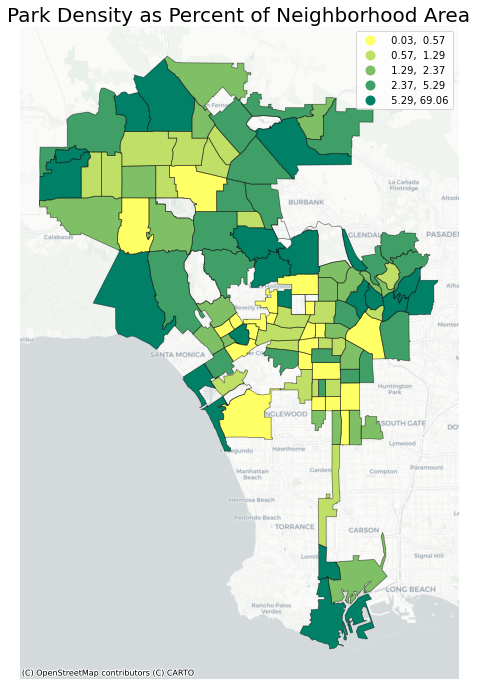

In [27]:
# plot park density by neighborhood!
fig, ax = plt.subplots(figsize=(12, 12))

trimmed_nhparksmerge.plot(ax=ax,
            column='percent park space',
            legend=True,
            scheme='quantiles',
            cmap='summer_r'
           )
new_nhcity_merc.plot(ax=ax,
            alpha=.5,
            linewidth=.75,
            facecolor="none",
            edgecolor="black"
            )
# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Park Density as Percent of Neighborhood Area',fontsize=20,pad=5)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

As this map shows, neighborhoods with the lowest percentages of park space tend to be clustered in South and Central LA. This makes sense as these areas are more dense and urban compared to the outer neighborhoods of LA. This also appears to match up with analysis in our first notebook that identified neighborhoods with the highest need for parks. 

### 5. Identify Neighborhoods with Lowest and Highest Percent Park Space ###
To further explore the relationship between neighborhoods with highest need and the least park space, I will identify and visualize the neighborhoods with the lowest and the highest percentages of park space.

In [28]:
# sort by lowest park density
nhparks_arealow = trimmed_nhparksmerge.sort_values(by=['percent park space'], ascending=[True]).head(5)
nhparks_arealow

,name,location_x,latitude_x,sqmi_x,slug,longitude_x,geometry,name_x,location_y,latitude_y,sqmi_y,longitude_y,geometry_x,name_y,geometry_y,park area,park area sq mi,percent park space
46,Harvard Heights,POINT(34.045060999124097 -118.307658),-118.307658,0.791828822117,harvard-heights,34.045060999124097,"MULTIPOLYGON (((-13169097.097 4035908.492, -13...",Harvard Heights,POINT(34.045060999124097 -118.307658),-118.307658,0.791828822117,34.045060999124097,"MULTIPOLYGON (((-13169097.097 4035908.492, -13...",Harvard Heights,"POLYGON ((-13169156.217 4034107.170, -13169145...",522.414156,0.000202,0.025473
12,Broadway-Manchester,POINT(33.941223502886629 -118.27535153247453),-118.27535153247453,1.55848582484,broadway-manchester,33.941223502886629,"MULTIPOLYGON (((-13166669.775 4023434.146, -13...",Broadway-Manchester,POINT(33.941223502886629 -118.27535153247453),-118.27535153247453,1.55848582484,33.941223502886629,"MULTIPOLYGON (((-13166669.775 4023434.146, -13...",Broadway-Manchester,"MULTIPOLYGON (((-13165889.432 4019944.535, -13...",1131.130112,0.000437,0.028023
103,West Los Angeles,POINT(34.047220499123917 -118.4307445),-118.4307445,1.04957313159,west-los-angeles,34.047220499123917,"MULTIPOLYGON (((-13184036.172 4033812.948, -13...",West Los Angeles,POINT(34.047220499123917 -118.4307445),-118.4307445,1.04957313159,34.047220499123917,"MULTIPOLYGON (((-13184036.172 4033812.948, -13...",West Los Angeles,"POLYGON ((-13182132.498 4035008.589, -13182333...",983.110106,0.000380,0.036165
62,Manchester Square,POINT(33.967165274809105 -118.30898400000005),-118.30898400000005,1.01264126487,manchester-square,33.967165274809105,"MULTIPOLYGON (((-13169118.804 4025380.392, -13...",Manchester Square,POINT(33.967165274809105 -118.30898400000005),-118.30898400000005,1.01264126487,33.967165274809105,"MULTIPOLYGON (((-13169118.804 4025380.392, -13...",Manchester Square,"POLYGON ((-13170589.243 4024881.007, -13170589...",1012.291542,0.000391,0.038597
2,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,1.03141523527,arlington-heights,34.04491049912405,"MULTIPOLYGON (((-13170866.743 4035868.587, -13...",Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,1.03141523527,34.04491049912405,"MULTIPOLYGON (((-13170866.743 4035868.587, -13...",Arlington Heights,"MULTIPOLYGON (((-13172278.574 4034217.186, -13...",1241.996681,0.000480,0.046493


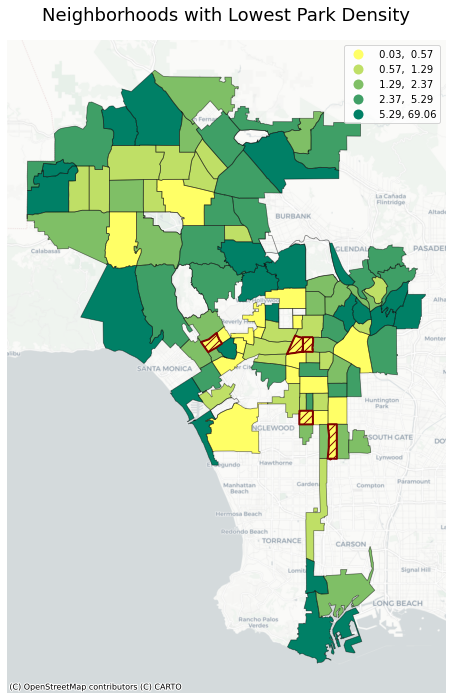

In [29]:
# plot areas with lowest park density
fig, ax = plt.subplots(figsize=(12,12))

# add the layer with ax=ax in the argument 
trimmed_nhparksmerge.plot(ax=ax,
            column='percent park space',
            legend=True,
            scheme='quantiles',
            cmap='summer_r'
           )
new_nhcity_merc.plot(ax=ax,
            alpha=.5,
            linewidth=.75,
            facecolor="none",
            edgecolor="black"
            )
nhparks_arealow.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='maroon'
        )

# turn the axis off but set custom axes
ax.axis('off')

# set a title
ax.set_title('Neighborhoods with Lowest Park Density',fontsize=18,pad=20)

ctx.add_basemap (ax=ax,source=ctx.providers.CartoDB.Positron)

In [30]:
# sort by highest park density
nhparks_areahi = trimmed_nhparksmerge.sort_values(by=['percent park space'], ascending=[False]).head(5)
nhparks_areahi

,name,location_x,latitude_x,sqmi_x,slug,longitude_x,geometry,name_x,location_y,latitude_y,sqmi_y,longitude_y,geometry_x,name_y,geometry_y,park area,park area sq mi,percent park space
30,Elysian Park,POINT(34.081259999123489 -118.23745650000001),-118.23745650000001,1.64508429808,elysian-park,34.081259999123489,"MULTIPOLYGON (((-13160791.549 4038733.344, -13...",Elysian Park,POINT(34.081259999123489 -118.23745650000001),-118.23745650000001,1.64508429808,34.081259999123489,"MULTIPOLYGON (((-13160791.549 4038733.344, -13...",Elysian Park,"MULTIPOLYGON (((-13163419.246 4039281.679, -13...",2.942585e+06,1.136138,69.062624
67,Montecito Heights,POINT(34.093658999123406 -118.19427049999999),-118.19427049999999,2.40964422507,montecito-heights,34.093658999123406,"MULTIPOLYGON (((-13155292.701 4043892.234, -13...",Montecito Heights,POINT(34.093658999123406 -118.19427049999999),-118.19427049999999,2.40964422507,34.093658999123406,"MULTIPOLYGON (((-13155292.701 4043892.234, -13...",Montecito Heights,"MULTIPOLYGON (((-13155390.773 4043858.486, -13...",2.427567e+06,0.937289,38.897388
51,Hollywood Hills,POINT(34.128088999122937 -118.33541000000008),-118.33541000000008,7.04764074288,hollywood-hills,34.128088999122937,"MULTIPOLYGON (((-13171078.361 4049244.612, -13...",Hollywood Hills,POINT(34.128088999122937 -118.33541000000008),-118.33541000000008,7.04764074288,34.128088999122937,"MULTIPOLYGON (((-13171078.361 4049244.612, -13...",Hollywood Hills,"MULTIPOLYGON (((-13170143.277 4048558.597, -13...",5.050725e+06,1.950096,27.670191
20,Cheviot Hills,POINT(34.04085349912404 -118.41146150000006),-118.41146150000006,1.53643338074,cheviot-hills,34.04085349912404,"MULTIPOLYGON (((-13180329.122 4032818.916, -13...",Cheviot Hills,POINT(34.04085349912404 -118.41146150000006),-118.41146150000006,1.53643338074,34.04085349912404,"MULTIPOLYGON (((-13180329.122 4032818.916, -13...",Cheviot Hills,"MULTIPOLYGON (((-13181418.910 4035505.630, -13...",1.077864e+06,0.416165,27.086465
44,Harbor City,POINT(33.797697296692832 -118.29516400000006),-118.29516400000006,2.58132095337,harbor-city,33.797697296692832,"MULTIPOLYGON (((-13169172.905 4003845.188, -13...",Harbor City,POINT(33.797697296692832 -118.29516400000006),-118.29516400000006,2.58132095337,33.797697296692832,"MULTIPOLYGON (((-13169172.905 4003845.188, -13...",Harbor City,"MULTIPOLYGON (((-13169244.340 4001835.018, -13...",1.773245e+06,0.684654,26.523379


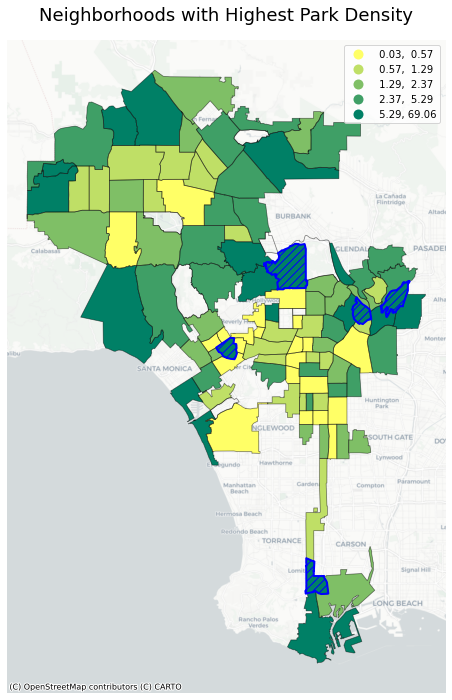

In [31]:
# plot areas with highest park density
fig, ax = plt.subplots(figsize=(12,12))

# add the layer with ax=ax in the argument 
trimmed_nhparksmerge.plot(ax=ax,
            column='percent park space',
            legend=True,
            scheme='quantiles',
            cmap='summer_r'
           )
new_nhcity_merc.plot(ax=ax,
            alpha=.5,
            linewidth=.75,
            facecolor="none",
            edgecolor="black"
            )
nhparks_areahi.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='blue'
        )

# turn the axis off but set custom axes
ax.axis('off')

# set a title
ax.set_title('Neighborhoods with Highest Park Density',fontsize=18,pad=20)

ctx.add_basemap (ax=ax,source=ctx.providers.CartoDB.Positron)

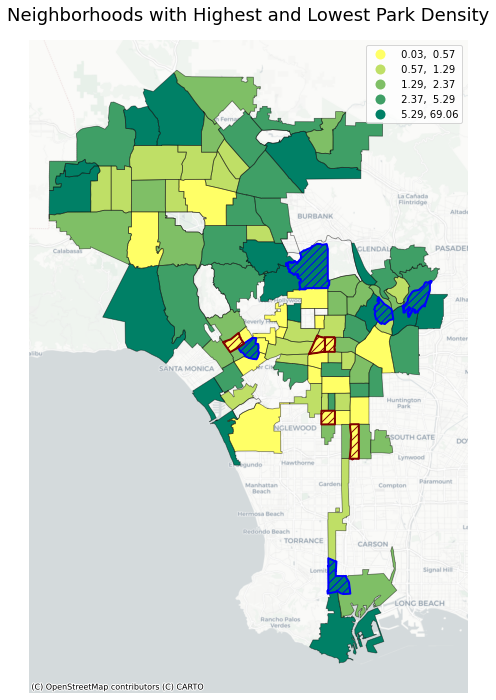

In [32]:
# combine maps
fig, ax = plt.subplots(figsize=(12,12))

# add the layer with ax=ax in the argument 
trimmed_nhparksmerge.plot(ax=ax,
            column='percent park space',
            legend=True,
            scheme='quantiles',
            cmap='summer_r'
           )
new_nhcity_merc.plot(ax=ax,
            alpha=.5,
            linewidth=.75,
            facecolor="none",
            edgecolor="black"
            )
nhparks_areahi.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='blue'
        )
nhparks_arealow.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='maroon'
        )
# turn the axis off but set custom axes
ax.axis('off')

# set a title
ax.set_title('Neighborhoods with Highest and Lowest Park Density',fontsize=18,pad=20)

ctx.add_basemap (ax=ax,source=ctx.providers.CartoDB.Positron)

Here, I outlined the neighborhoods with the 5 lowest and 5 highest percentages of park space. The neighborhoods with the highest percentage of park space tend to have large regional parks that take up a great deal of the neighborhood area and generally are not typical of parks in LA neighborhoods. They also tend to be outside of the city’s urban core. 

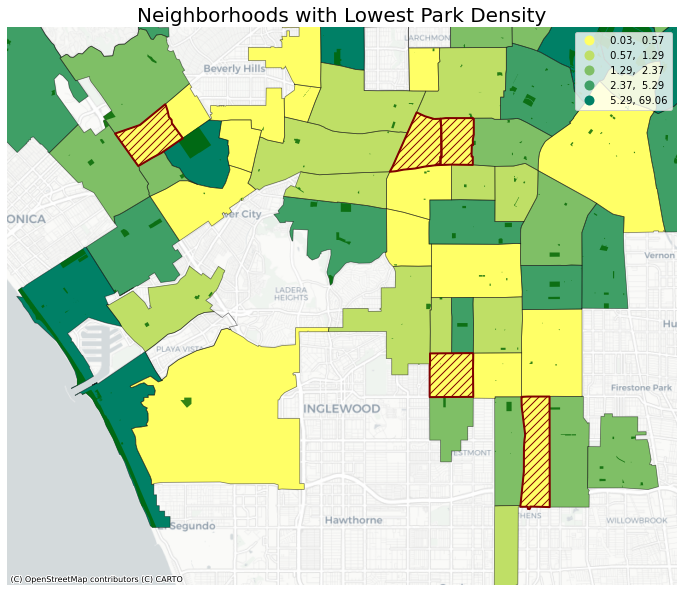

In [33]:
# zoom neighborhoods with lowest park density

fig, ax = plt.subplots(figsize=(12, 12))

# add the layer with ax=ax in the argument 
trimmed_nhparksmerge.plot(ax=ax,
            column='percent park space',
            legend=True,
            scheme='quantiles',
            cmap='summer_r'
           )
new_nhcity_merc.plot(ax=ax,
            alpha=.5,
            linewidth=.75,
            facecolor="none",
            edgecolor="black"
            )
nhparks_arealow.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='maroon'
        )
parksnh_clip.plot(ax=ax,
          color="darkgreen",
           alpha=0.8
          )
# turn the axis off
ax.axis('off')
ax.set_ylim([4015000, 4040000])
ax.set_xlim([-13190000, -13160000])

# set a title
ax.set_title('Neighborhoods with Lowest Park Density',fontsize=20,pad=5)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

Looking more closely at areas with the lowest percentages of park space, it appears that they don’t have parks in them at all, but they are just tiny and hard to see. Contrary to areas with the highest density of parks, these are mostly urban areas. Some are clustered in South Central LA, an area determined by Carolyn to be one of the highest need areas. Others are more surprising, and in relatively wealthier areas, like West LA. To get an even clearer picture of where parks are needed, we must consider population in relation to parks space. 


### 6. Calculating Park Space Per Capita ###
Now, I will calculate park space per capita by bringing in census data and joining it to my existing parks data. 

In [34]:
# import census data on race and reproject it 
cenrace = gpd.read_file('acs2019_5yr_B03002_14000US06037222001.geojson')
cenrace_mercator = cenrace.to_crs(epsg=3857)

In [35]:
# trim census data by only keeping some columns
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [36]:
cenrace_mercator = cenrace_mercator[columns_to_keep]

In [37]:
# rename columns for the sake of clarity
cenrace_mercator.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']
cenrace_mercator.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-13169350.794 4063591.834, -13..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-13169467.902 4065613.937, -13..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-13169034.646 4063225.625, -13..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-13167528.939 4062726.771, -13..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-13166671.668 4062511.964, -13..."


In [38]:
# sort by highest to find the LA overall row
cenrace_mercator.sort_values(by='Total',ascending = False).head(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1004,16000US0644000,"Los Angeles, CA",3966936.0,2044527.0,1129956.0,341750.0,6374.0,454688.0,5103.0,14762.0,91894.0,1922409.0,"MULTIPOLYGON (((-13210080.926 4054325.107, -13..."
922,14000US06037275602,"Census Tract 2756.02, Los Angeles, CA",12100.0,10449.0,6371.0,795.0,0.0,2802.0,0.0,0.0,481.0,1651.0,"MULTIPOLYGON (((-13183818.765 4025447.778, -13..."
847,14000US06037265301,"Census Tract 2653.01, Los Angeles, CA",11977.0,9290.0,3160.0,486.0,17.0,4808.0,19.0,22.0,778.0,2687.0,"MULTIPOLYGON (((-13186404.940 4038991.381, -13..."
531,14000US06037206020,"Census Tract 2060.20, Los Angeles, CA",8947.0,5083.0,1657.0,2773.0,51.0,328.0,49.0,59.0,166.0,3864.0,"MULTIPOLYGON (((-13162179.036 4036091.625, -13..."
84,14000US06037111400,"Census Tract 1114, Los Angeles, CA",8735.0,5011.0,3376.0,390.0,0.0,1227.0,0.0,18.0,0.0,3724.0,"MULTIPOLYGON (((-13191626.269 4062578.493, -13..."


In [39]:
# drop the LA overall row
cenrace_mercator = cenrace_mercator.drop([1004])
cenrace_mercator

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-13169350.794 4063591.834, -13..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-13169467.902 4065613.937, -13..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-13169034.646 4063225.625, -13..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-13167528.939 4062726.771, -13..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-13166671.668 4062511.964, -13..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",223.0,169.0,136.0,16.0,6.0,11.0,0.0,0.0,0.0,54.0,"MULTIPOLYGON (((-13193418.068 4053521.172, -13..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",26.0,19.0,7.0,11.0,0.0,0.0,0.0,0.0,1.0,7.0,"MULTIPOLYGON (((-13174854.541 4066507.512, -13..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-13186067.419 4021171.146, -13..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1175.0,788.0,393.0,232.0,26.0,36.0,24.0,25.0,52.0,387.0,"MULTIPOLYGON (((-13168099.229 3995788.284, -13..."


In [40]:
# join the census data with neighborhood data
cenrace_nhparks_join = gpd.sjoin(trimmed_nhparksmerge, cenrace_mercator)
cenrace_nhparks_join

,name_left,location_x,latitude_x,sqmi_x,slug,longitude_x,geometry,name_x,location_y,latitude_y,...,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic
0,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,0.805350187789,adams-normandie,34.031461499124156,"MULTIPOLYGON (((-13170098.527 4033826.516, -13...",Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,...,4331.0,1773.0,236.0,1213.0,0.0,293.0,0.0,0.0,31.0,2558.0
34,Exposition Park,POINT(34.018262499124305 -118.29887550000007),-118.29887550000007,1.84679077622,exposition-park,34.018262499124305,"MULTIPOLYGON (((-13169697.777 4032255.042, -13...",Exposition Park,POINT(34.018262499124305 -118.29887550000007),-118.29887550000007,...,4331.0,1773.0,236.0,1213.0,0.0,293.0,0.0,0.0,31.0,2558.0
0,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,0.805350187789,adams-normandie,34.031461499124156,"MULTIPOLYGON (((-13170098.527 4033826.516, -13...",Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,...,3142.0,1197.0,367.0,760.0,0.0,13.0,0.0,8.0,49.0,1945.0
34,Exposition Park,POINT(34.018262499124305 -118.29887550000007),-118.29887550000007,1.84679077622,exposition-park,34.018262499124305,"MULTIPOLYGON (((-13169697.777 4032255.042, -13...",Exposition Park,POINT(34.018262499124305 -118.29887550000007),-118.29887550000007,...,3142.0,1197.0,367.0,760.0,0.0,13.0,0.0,8.0,49.0,1945.0
55,Jefferson Park,POINT(34.028211499124154 -118.32205850000005),-118.32205850000005,1.4190200982,jefferson-park,34.028211499124154,"MULTIPOLYGON (((-13170098.527 4033692.182, -13...",Jefferson Park,POINT(34.028211499124154 -118.32205850000005),-118.32205850000005,...,3142.0,1197.0,367.0,760.0,0.0,13.0,0.0,8.0,49.0,1945.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Woodland Hills,POINT(34.159408692550485 -118.61521650000006),-118.61521650000006,14.768309648,woodland-hills,34.159408692550485,"MULTIPOLYGON (((-13199785.431 4054103.999, -13...",Woodland Hills,POINT(34.159408692550485 -118.61521650000006),-118.61521650000006,...,6029.0,4851.0,3335.0,303.0,0.0,872.0,0.0,0.0,341.0,1178.0
108,Woodland Hills,POINT(34.159408692550485 -118.61521650000006),-118.61521650000006,14.768309648,woodland-hills,34.159408692550485,"MULTIPOLYGON (((-13199785.431 4054103.999, -13...",Woodland Hills,POINT(34.159408692550485 -118.61521650000006),-118.61521650000006,...,2754.0,2350.0,1897.0,64.0,0.0,229.0,0.0,22.0,138.0,404.0
108,Woodland Hills,POINT(34.159408692550485 -118.61521650000006),-118.61521650000006,14.768309648,woodland-hills,34.159408692550485,"MULTIPOLYGON (((-13199785.431 4054103.999, -13...",Woodland Hills,POINT(34.159408692550485 -118.61521650000006),-118.61521650000006,...,5382.0,4532.0,3400.0,76.0,25.0,995.0,0.0,11.0,25.0,850.0
108,Woodland Hills,POINT(34.159408692550485 -118.61521650000006),-118.61521650000006,14.768309648,woodland-hills,34.159408692550485,"MULTIPOLYGON (((-13199785.431 4054103.999, -13...",Woodland Hills,POINT(34.159408692550485 -118.61521650000006),-118.61521650000006,...,2271.0,2100.0,1679.0,84.0,2.0,140.0,0.0,3.0,192.0,171.0


In [41]:
# group data by neighborhood and add together population totals of each census tract within a neighborhood
group_cenrace_nhparks = cenrace_nhparks_join.groupby(['slug']).sum('Total').reset_index()
group_cenrace_nhparks

,slug,park area,park area sq mi,percent park space,index_right,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic
0,adams-normandie,1.778582e+05,0.068671,8.526902,7497,37987.0,15859.0,3562.0,7033.0,17.0,4381.0,64.0,70.0,732.0,22128.0
1,arleta,1.082651e+06,0.418014,13.500961,1595,60967.0,17651.0,8857.0,970.0,97.0,6898.0,12.0,145.0,672.0,43316.0
2,arlington-heights,1.614596e+04,0.006234,0.604411,8347,44180.0,22893.0,4245.0,7004.0,53.0,10532.0,113.0,141.0,805.0,21287.0
3,atwater-village,3.319314e+06,1.281594,72.125546,2949,18389.0,8754.0,4609.0,175.0,141.0,3217.0,28.0,60.0,524.0,9635.0
4,baldwin-hillscrenshaw,5.140404e+06,1.984721,68.825395,9390,50379.0,33167.0,3863.0,25129.0,110.0,2480.0,70.0,323.0,1192.0,17212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,westwood,3.308181e+06,1.277296,34.749003,17135,81618.0,73051.0,46429.0,2729.0,60.0,18807.0,108.0,178.0,4740.0,8567.0
102,wilmington,6.874328e+06,2.654193,29.035205,21209,77665.0,19162.0,8537.0,3852.0,82.0,5131.0,641.0,67.0,852.0,58503.0
103,windsor-square,5.041468e+04,0.019465,2.848025,2644,18058.0,15487.0,7978.0,700.0,2.0,5720.0,0.0,110.0,977.0,2571.0
104,winnetka,2.897417e+06,1.118699,23.417265,4599,97004.0,52237.0,30119.0,4349.0,130.0,14416.0,177.0,506.0,2540.0,44767.0


In [42]:
# calculate park space per capita
group_cenrace_nhparks["park sq mi per 1000 people"] = group_cenrace_nhparks['park area sq mi']/group_cenrace_nhparks['Total']*1000
group_cenrace_nhparks.head()

,slug,park area,park area sq mi,percent park space,index_right,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,park sq mi per 1000 people
0,adams-normandie,1.778582e+05,0.068671,8.526902,7497,37987.0,15859.0,3562.0,7033.0,17.0,4381.0,64.0,70.0,732.0,22128.0,0.001808
1,arleta,1.082651e+06,0.418014,13.500961,1595,60967.0,17651.0,8857.0,970.0,97.0,6898.0,12.0,145.0,672.0,43316.0,0.006856
2,arlington-heights,1.614596e+04,0.006234,0.604411,8347,44180.0,22893.0,4245.0,7004.0,53.0,10532.0,113.0,141.0,805.0,21287.0,0.000141
3,atwater-village,3.319314e+06,1.281594,72.125546,2949,18389.0,8754.0,4609.0,175.0,141.0,3217.0,28.0,60.0,524.0,9635.0,0.069694
4,baldwin-hillscrenshaw,5.140404e+06,1.984721,68.825395,9390,50379.0,33167.0,3863.0,25129.0,110.0,2480.0,70.0,323.0,1192.0,17212.0,0.039396


### 7. Visualize Percent Park Space by Neighborhood ###
In order to visualize park sq per 1000 people, I need to convert my grouped dataframe back into a geodataframe. Then I will plot my results.

In [43]:
# get list of columns
group_cenrace_nhparks.columns

Index(['slug', 'park area', 'park area sq mi', 'percent park space',
       'index_right', 'Total', 'Non Hispanic', 'Non Hispanic White',
       'Non Hispanic Black', 'Non Hispanic American Indian and Alaska Native',
       'Non Hispanic Asian',
       'Non Hispanic Native Hawaiian and Other Pacific Islander',
       'Non Hispanic Some other race', 'Non Hispanic Two or more races',
       'Hispanic', 'park sq mi per 1000 people'],
      dtype='object')

In [44]:
# remove unnecessary columns from dataframe
group_cenrace_nhparks = group_cenrace_nhparks.drop(columns=['Non Hispanic', 'Non Hispanic White', 'Non Hispanic Black', 'Non Hispanic American Indian and Alaska Native', 'Non Hispanic Asian','Non Hispanic Native Hawaiian and Other Pacific Islander','Non Hispanic Some other race', 'Non Hispanic Two or more races', 'Hispanic'])
                                            

In [45]:
group_cenrace_nhparks

,slug,park area,park area sq mi,percent park space,index_right,Total,park sq mi per 1000 people
0,adams-normandie,1.778582e+05,0.068671,8.526902,7497,37987.0,0.001808
1,arleta,1.082651e+06,0.418014,13.500961,1595,60967.0,0.006856
2,arlington-heights,1.614596e+04,0.006234,0.604411,8347,44180.0,0.000141
3,atwater-village,3.319314e+06,1.281594,72.125546,2949,18389.0,0.069694
4,baldwin-hillscrenshaw,5.140404e+06,1.984721,68.825395,9390,50379.0,0.039396
...,...,...,...,...,...,...,...
101,westwood,3.308181e+06,1.277296,34.749003,17135,81618.0,0.015650
102,wilmington,6.874328e+06,2.654193,29.035205,21209,77665.0,0.034175
103,windsor-square,5.041468e+04,0.019465,2.848025,2644,18058.0,0.001078
104,winnetka,2.897417e+06,1.118699,23.417265,4599,97004.0,0.011533


In [46]:
# I need to merge my joined and grouped census race data back to my neighborhood data, because it is not a geodataframe
merge_cenrace_nhparks = trimmed_nhparksmerge.merge(group_cenrace_nhparks, on='slug')
merge_cenrace_nhparks

,name,location_x,latitude_x,sqmi_x,slug,longitude_x,geometry,name_x,location_y,latitude_y,...,geometry_y,park area_x,park area sq mi_x,percent park space_x,park area_y,park area sq mi_y,percent park space_y,index_right,Total,park sq mi per 1000 people
0,Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,0.805350187789,adams-normandie,34.031461499124156,"MULTIPOLYGON (((-13170098.527 4033826.516, -13...",Adams-Normandie,POINT(34.031461499124156 -118.30020800000011),-118.30020800000011,...,"MULTIPOLYGON (((-13169419.979 4032920.598, -13...",16168.924480,0.006243,0.775173,1.778582e+05,0.068671,8.526902,7497,37987.0,0.001808
1,Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,3.09617917557,arleta,34.243099999121583,"MULTIPOLYGON (((-13182678.409 4058933.425, -13...",Arleta,POINT(34.243099999121583 -118.4307575),-118.4307575,...,"MULTIPOLYGON (((-13182793.475 4060205.490, -13...",90220.929026,0.034834,1.125080,1.082651e+06,0.418014,13.500961,1595,60967.0,0.006856
2,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,1.03141523527,arlington-heights,34.04491049912405,"MULTIPOLYGON (((-13170866.743 4035868.587, -13...",Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,...,"MULTIPOLYGON (((-13172278.574 4034217.186, -13...",1241.996681,0.000480,0.046493,1.614596e+04,0.006234,0.604411,8347,44180.0,0.000141
3,Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,1.77689394489,atwater-village,34.131066356759177,"MULTIPOLYGON (((-13166682.881 4049365.698, -13...",Atwater Village,POINT(34.131066356759177 -118.26237347966236),-118.26237347966236,...,"MULTIPOLYGON (((-13165799.570 4045104.115, -13...",553219.071555,0.213599,12.020924,3.319314e+06,1.281594,72.125546,2949,18389.0,0.069694
4,Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,1.44245256524,vermont-slauson,33.983913999124709,"MULTIPOLYGON (((-13166936.942 4027904.295, -13...",Vermont-Slauson,POINT(33.983913999124709 -118.29035750000011),-118.29035750000011,...,"MULTIPOLYGON (((-13167671.217 4025577.739, -13...",27552.524321,0.010638,0.737500,3.581828e+05,0.138295,9.587501,9998,55995.0,0.002470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Westwood,POINT(34.06523499912381 -118.44047994677246),-118.44047994677246,3.6757772963,westwood,34.06523499912381,"MULTIPOLYGON (((-13183557.499 4039456.131, -13...",Westwood,POINT(34.06523499912381 -118.44047994677246),-118.44047994677246,...,"MULTIPOLYGON (((-13185329.755 4036229.382, -13...",165409.069891,0.063865,1.737450,3.308181e+06,1.277296,34.749003,17135,81618.0,0.015650
102,Wilmington,POINT(33.79129350128175 -118.25918700000008),-118.25918700000008,9.1412927044,wilmington,33.79129350128175,"MULTIPOLYGON (((-13160720.194 4005275.275, -13...",Wilmington,POINT(33.79129350128175 -118.25918700000008),-118.25918700000008,...,"MULTIPOLYGON (((-13168104.946 3997108.550, -13...",312469.476720,0.120645,1.319782,6.874328e+06,2.654193,29.035205,21209,77665.0,0.034175
103,Windsor Square,POINT(34.069108499123722 -118.31990900000005),-118.31990900000005,0.683463802484,windsor-square,34.069108499123722,"MULTIPOLYGON (((-13170621.840 4039053.203, -13...",Windsor Square,POINT(34.069108499123722 -118.31990900000005),-118.31990900000005,...,"MULTIPOLYGON (((-13171743.216 4038864.233, -13...",10082.936435,0.003893,0.569605,5.041468e+04,0.019465,2.848025,2644,18058.0,0.001078
104,Winnetka,POINT(34.210459499121988 -118.57521950000014),-118.57521950000014,4.77724070209,winnetka,34.210459499121988,"MULTIPOLYGON (((-13198285.178 4059929.744, -13...",Winnetka,POINT(34.210459499121988 -118.57521950000014),-118.57521950000014,...,"MULTIPOLYGON (((-13201182.636 4055347.431, -13...",152495.651611,0.058879,1.232488,2.897417e+06,1.118699,23.417265,4599,97004.0,0.011533


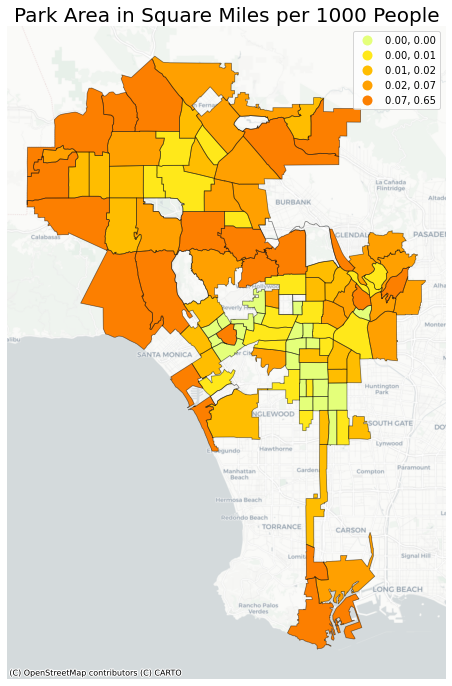

In [47]:
# plot park sq mi per 1000 people by neighborhood!
fig, ax = plt.subplots(figsize=(12, 12))

merge_cenrace_nhparks.plot(ax=ax,
            column='park sq mi per 1000 people',
            legend=True,
            scheme='quantiles',
            cmap='Wistia'
           )
new_nhcity_merc.plot(ax=ax,
            alpha=.5,
            linewidth=.75,
            facecolor="none",
            edgecolor="black"
            )

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Park Area in Square Miles per 1000 People',fontsize=20,pad=5)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

Like the density maps, the neighborhoods with the most amount of park space per capita tend to be in the outer areas of the city, while the central urban areas tend to have less park space per capita. 

### 8. Identify Neighborhoods with Lowest and Highest Park Space Per Capita ###
Finally, I can now plot the areas with the highest lowest amounts of park space per capita, in order to determine where parks are most and least needed in LA.

In [48]:
nhparks_hicap = merge_cenrace_nhparks.sort_values(by=['park sq mi per 1000 people'], ascending=[False]).head(5)
nhparks_hicap

,name,location_x,latitude_x,sqmi_x,slug,longitude_x,geometry,name_x,location_y,latitude_y,...,geometry_y,park area_x,park area sq mi_x,percent park space_x,park area_y,park area sq mi_y,percent park space_y,index_right,Total,park sq mi per 1000 people
81,Shadow Hills,POINT(34.239428499121757 -118.32881067473647),-118.32881067473647,12.8068716307,shadow-hills,34.239428499121757,"MULTIPOLYGON (((-13173621.566 4065431.405, -13...",Shadow Hills,POINT(34.239428499121757 -118.32881067473647),-118.32881067473647,...,"MULTIPOLYGON (((-13167164.256 4060228.656, -13...",4.984478e+06,1.924518,15.027229,5.482926e+07,21.169697,165.299516,2354,32679.0,0.647807
49,Hollywood Hills,POINT(34.128088999122937 -118.33541000000008),-118.33541000000008,7.04764074288,hollywood-hills,34.128088999122937,"MULTIPOLYGON (((-13171078.361 4049244.612, -13...",Hollywood Hills,POINT(34.128088999122937 -118.33541000000008),-118.33541000000008,...,"MULTIPOLYGON (((-13170143.277 4048558.597, -13...",5.050725e+06,1.950096,27.670191,7.576087e+07,29.251435,415.052862,6761,50444.0,0.579879
41,Granada Hills,POINT(34.295682651151957 -118.50767050010745),-118.50767050010745,15.1114320603,granada-hills,34.295682651151957,"MULTIPOLYGON (((-13190263.830 4071176.720, -13...",Granada Hills,POINT(34.295682651151957 -118.50767050010745),-118.50767050010745,...,"MULTIPOLYGON (((-13194423.060 4066367.267, -13...",4.623658e+06,1.785204,11.813601,1.248388e+08,48.200518,318.967239,2780,104393.0,0.461722
69,Pacific Palisades,POINT(34.078366733694963 -118.54585899824386),-118.54585899824386,22.8376013762,pacific-palisades,34.078366733694963,"MULTIPOLYGON (((-13197740.158 4045841.709, -13...",Pacific Palisades,POINT(34.078366733694963 -118.54585899824386),-118.54585899824386,...,"MULTIPOLYGON (((-13192813.868 4038010.341, -13...",3.536146e+06,1.365314,5.978359,4.950605e+07,19.114392,83.697022,9803,48296.0,0.395776
30,Elysian Park,POINT(34.081259999123489 -118.23745650000001),-118.23745650000001,1.64508429808,elysian-park,34.081259999123489,"MULTIPOLYGON (((-13160791.549 4038733.344, -13...",Elysian Park,POINT(34.081259999123489 -118.23745650000001),-118.23745650000001,...,"MULTIPOLYGON (((-13163419.246 4039281.679, -13...",2.942585e+06,1.136138,69.062624,2.648326e+07,10.225245,621.563616,4841,32615.0,0.313514


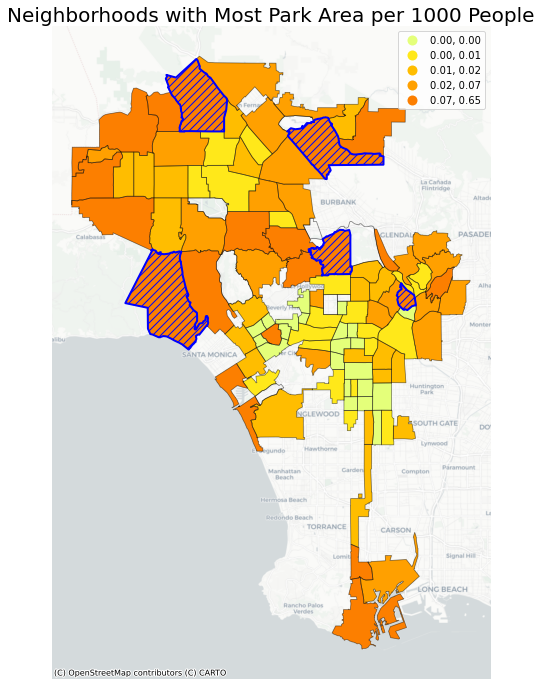

In [49]:
# plot highest parks per capita neighborhoods

fig, ax = plt.subplots(figsize=(12, 12))

merge_cenrace_nhparks.plot(ax=ax,
            column='park sq mi per 1000 people',
            legend=True,
            scheme='quantiles',
            cmap='Wistia'
           )
new_nhcity_merc.plot(ax=ax,
            alpha=.5,
            linewidth=.75,
            facecolor="none",
            edgecolor="black"
            )
nhparks_hicap.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='blue'
        )
# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Neighborhoods with Most Park Area per 1000 People',fontsize=20,pad=5)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

In [50]:
nhparks_lowcap = merge_cenrace_nhparks.sort_values(by=['park sq mi per 1000 people'], ascending=[True]).head(5)
nhparks_lowcap

,name,location_x,latitude_x,sqmi_x,slug,longitude_x,geometry,name_x,location_y,latitude_y,...,geometry_y,park area_x,park area sq mi_x,percent park space_x,park area_y,park area sq mi_y,percent park space_y,index_right,Total,park sq mi per 1000 people
44,Harvard Heights,POINT(34.045060999124097 -118.307658),-118.307658,0.791828822117,harvard-heights,34.045060999124097,"MULTIPOLYGON (((-13169097.097 4035908.492, -13...",Harvard Heights,POINT(34.045060999124097 -118.307658),-118.307658,...,"POLYGON ((-13169156.217 4034107.170, -13169145...",522.414156,0.000202,0.025473,5224.141558,0.002017,0.254733,6508,34130.0,0.000059
100,West Los Angeles,POINT(34.047220499123917 -118.4307445),-118.4307445,1.04957313159,west-los-angeles,34.047220499123917,"MULTIPOLYGON (((-13184036.172 4033812.948, -13...",West Los Angeles,POINT(34.047220499123917 -118.4307445),-118.4307445,...,"POLYGON ((-13182132.498 4035008.589, -13182333...",983.110106,0.000380,0.036165,6881.770742,0.002657,0.253157,6037,32198.0,0.000083
60,Manchester Square,POINT(33.967165274809105 -118.30898400000005),-118.30898400000005,1.01264126487,manchester-square,33.967165274809105,"MULTIPOLYGON (((-13169118.804 4025380.392, -13...",Manchester Square,POINT(33.967165274809105 -118.30898400000005),-118.30898400000005,...,"POLYGON ((-13170589.243 4024881.007, -13170589...",1012.291542,0.000391,0.038597,5061.457709,0.001954,0.192984,3895,23623.0,0.000083
12,Broadway-Manchester,POINT(33.941223502886629 -118.27535153247453),-118.27535153247453,1.55848582484,broadway-manchester,33.941223502886629,"MULTIPOLYGON (((-13166669.775 4023434.146, -13...",Broadway-Manchester,POINT(33.941223502886629 -118.27535153247453),-118.27535153247453,...,"MULTIPOLYGON (((-13165889.432 4019944.535, -13...",1131.130112,0.000437,0.028023,21491.472129,0.008298,0.532434,15446,90758.0,0.000091
2,Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,1.03141523527,arlington-heights,34.04491049912405,"MULTIPOLYGON (((-13170866.743 4035868.587, -13...",Arlington Heights,POINT(34.04491049912405 -118.3234085),-118.3234085,...,"MULTIPOLYGON (((-13172278.574 4034217.186, -13...",1241.996681,0.000480,0.046493,16145.956858,0.006234,0.604411,8347,44180.0,0.000141


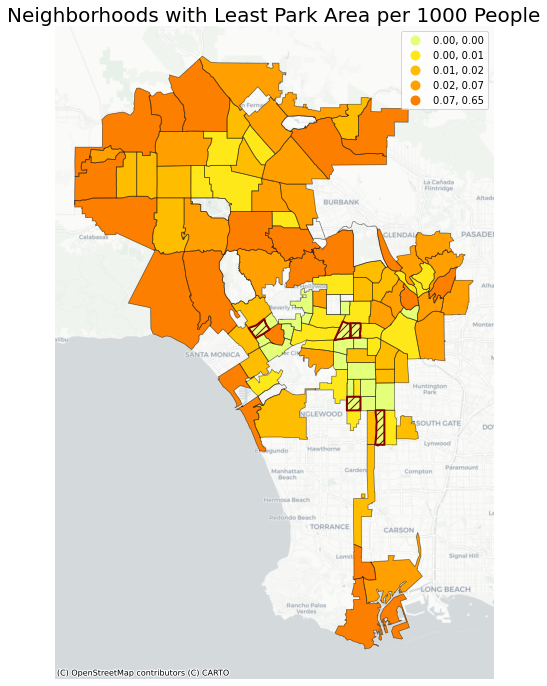

In [51]:
# plot lowest parks per capita neighborhoods

fig, ax = plt.subplots(figsize=(12, 12))

merge_cenrace_nhparks.plot(ax=ax,
            column='park sq mi per 1000 people',
            legend=True,
            scheme='quantiles',
            cmap='Wistia'
           )
new_nhcity_merc.plot(ax=ax,
            alpha=.5,
            linewidth=.75,
            facecolor="none",
            edgecolor="black"
            )
nhparks_lowcap.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='maroon'
        )
# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Neighborhoods with Least Park Area per 1000 People',fontsize=20,pad=5)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

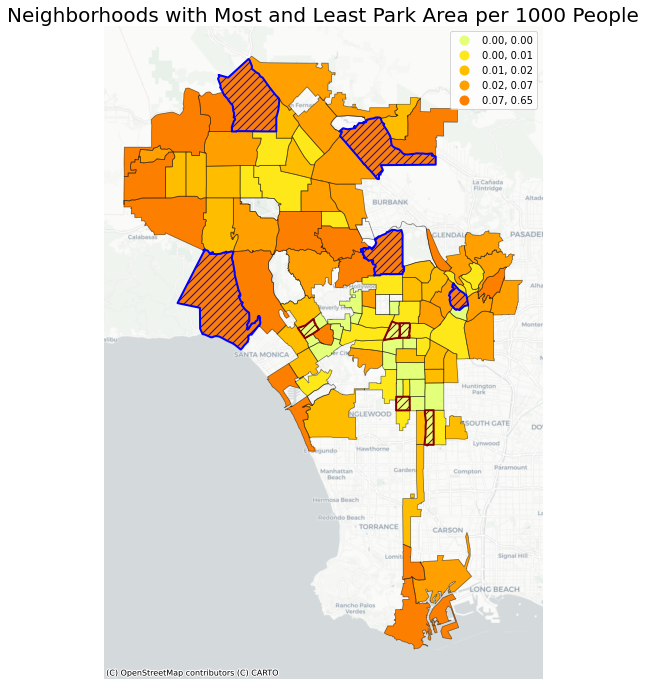

In [52]:
# combine maps

fig, ax = plt.subplots(figsize=(12, 12))

merge_cenrace_nhparks.plot(ax=ax,
            column='park sq mi per 1000 people',
            legend=True,
            scheme='quantiles',
            cmap='Wistia'
           )
new_nhcity_merc.plot(ax=ax,
            alpha=.5,
            linewidth=.75,
            facecolor="none",
            edgecolor="black"
            )
nhparks_hicap.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='blue'
        )
nhparks_lowcap.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='maroon'
        )
# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Neighborhoods with Most and Least Park Area per 1000 People',fontsize=20,pad=5)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

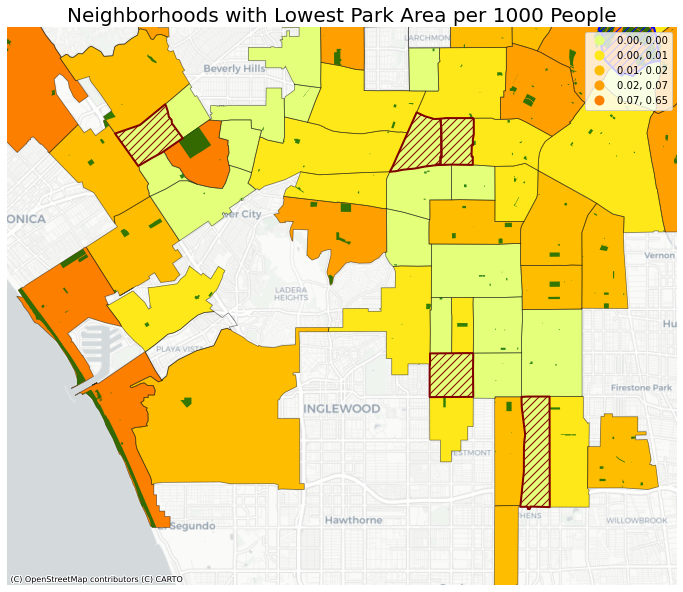

In [53]:
# zoom lowest parks per capita neighborhoods

fig, ax = plt.subplots(figsize=(12, 12))

merge_cenrace_nhparks.plot(ax=ax,
            column='park sq mi per 1000 people',
            legend=True,
            scheme='quantiles',
            cmap='Wistia'
           )
new_nhcity_merc.plot(ax=ax,
            alpha=.5,
            linewidth=.75,
            facecolor="none",
            edgecolor="black"
            )
nhparks_hicap.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='blue'
        )
nhparks_lowcap.boundary.plot(ax=ax,
        alpha=1,
        linewidth=2,
        hatch="///",
        color='maroon'
        )
parksnh_clip.plot(ax=ax,
          color="darkgreen",
           alpha=0.8
          )
# turn the axis off
ax.axis('off')
ax.set_ylim([4015000, 4040000])
ax.set_xlim([-13190000, -13160000])

# set a title
ax.set_title('Neighborhoods with Lowest Park Area per 1000 People',fontsize=20,pad=5)

# add a basemap
ctx.add_basemap (ax,source=ctx.providers.CartoDB.Positron)

Zooming in on the neighborhoods with the lowest amount of park space per capita, we see that they are the same 5 neighborhoods as the ones with the lowest park density. Again, these are neighborhoods that appear to have no parks but are very small, and located in South and central LA, with West LA being an anomaly. 

It is important to note that West LA is adjacent to Cheviot Hills, one of the neighborhoods we identified as having the highest park density, and is easily accessible to West LA residents. Additionally, West LA is not a high need neighborhood. Comparing the South LA neighborhoods, we see they are only adjacent to other extremely park poor neighborhoods and they are high need areas according to Carolyn’s index.

This goes to show that neither Carolyn's index nor my maps as measures of parks equity tell the full story—  we must consider multiple means of measuring parks access and equity when attempting to answer our research question.

Putting our research together, we can clearly see that there is overlap of both need, and lack of park space in relation to population, in the South Central LA area. Therefore, our research suggests that South Central should be prioritized in the creation or expansion of parks. 
